In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import chess
from stockfish import Stockfish
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/chess-eval.csv')

elo_bins = [0, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 3000]
elo_labels = ['<1200', '1200-1399', '1400-1599', '1600-1799', '1800-1999', '2000-2199', '2200-2399', '2400+']
## probably the same
df['white_group'] = pd.cut(df['white_rating'], bins=elo_bins, labels=elo_labels)
df['black_group'] = pd.cut(df['black_rating'], bins=elo_bins, labels=elo_labels)

white_resigns = df.loc[df['white_result'] == 'resigned'].sort_values(by=['white_rating'])
black_resigns = df.loc[df['black_result'] == 'resigned'].sort_values(by=['black_rating'])

white_resigns['evaluation'].mean(), black_resigns['evaluation'].mean()

(-7.416169132258777, 7.532310637417218)

In [47]:
len(black_resigns) + len(white_resigns)

23288

In [50]:
black_resigns

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,rules,rated,fen,pgn,evaluation,mate,white_group,black_group
28355,3YearOldChessProdigy,rgcorpus11_07,https://api.chess.com/pub/player/3yearoldchess...,https://api.chess.com/pub/player/rgcorpus11_07,123,100,win,resigned,blitz,600,chess,True,rnbqkbnr/ppp1pppp/8/3p4/4P3/8/PPPP1PPP/RNBQKBN...,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",0.49,NaN,<1200,<1200
61669,abderahmanebencheikh,IAmPathetic101,https://api.chess.com/pub/player/abderahmanebe...,https://api.chess.com/pub/player/iampathetic101,251,100,win,resigned,blitz,600,chess,True,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",0.31,NaN,<1200,<1200
55899,Abbasmajith,Pedri2207,https://api.chess.com/pub/player/abbasmajith,https://api.chess.com/pub/player/pedri2207,404,100,win,resigned,blitz,180,threecheck,True,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,"[Event ""Live Chess - Three-Check""]\n[Site ""Che...",0.31,NaN,<1200,<1200
35664,6thlaike,Carol_00,https://api.chess.com/pub/player/6thlaike,https://api.chess.com/pub/player/carol_00,276,100,win,resigned,blitz,600,chess,True,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",0.31,NaN,<1200,<1200
45407,EdieHackert,AadhiImran123,https://api.chess.com/pub/player/ediehackert,https://api.chess.com/pub/player/aadhiimran123,132,100,win,resigned,rapid,600,chess,True,rnb1k1nr/ppqppp1p/6p1/8/8/1P6/P1PPPPPP/b1BQKBN...,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",-5.61,NaN,<1200,<1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8136,goranm21,123dragan123,https://api.chess.com/pub/player/goranm21,https://api.chess.com/pub/player/123dragan123,2546,2470,win,resigned,blitz,180,chess,True,3r2k1/8/6Rb/1q1p1r1p/2pB4/2P2QPP/6K1/R7 b - -,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",NaN,8.0,2400+,2400+
8135,misshersomuch,123dragan123,https://api.chess.com/pub/player/misshersomuch,https://api.chess.com/pub/player/123dragan123,2491,2477,win,resigned,blitz,180,chess,True,6R1/1p2PB1k/1r1p1r1p/p4p2/P1P2p1P/1Pb3p1/5PP1/...,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",NaN,9.0,2400+,2400+
26577,Never_walk_alone,335394862,https://api.chess.com/pub/player/never_walk_alone,https://api.chess.com/pub/player/335394862,2486,2490,win,resigned,bullet,60,chess,True,8/p6p/1p1p4/8/2Pk4/1P3BP1/P4NKP/8 b - -,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",6.06,NaN,2400+,2400+
8133,Democrachess89,123dragan123,https://api.chess.com/pub/player/democrachess89,https://api.chess.com/pub/player/123dragan123,2513,2494,win,resigned,blitz,180,chess,True,1r2r1kb/5P2/p1pp2pB/2p1p3/8/2P3P1/PP3R1P/3R2K1...,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",5.63,NaN,2400+,2400+


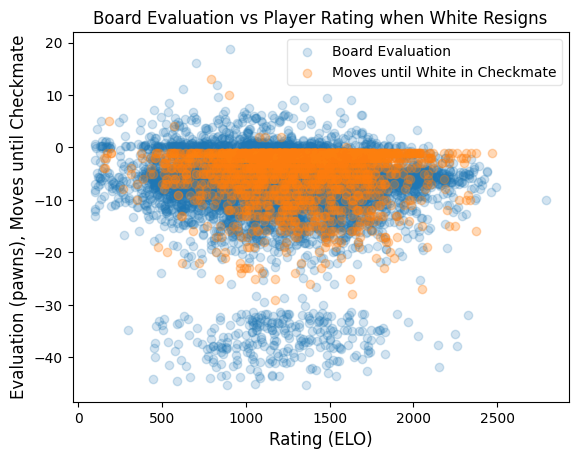

In [49]:
plt.title('Board Evaluation vs Player Rating when White Resigns')
plt.xlabel('Rating (ELO)', fontsize=12)
plt.ylabel('Evaluation (pawns), Moves until Checkmate', fontsize=12)
plt.scatter(white_resigns['white_rating'], white_resigns['evaluation'], alpha=0.2, label='Board Evaluation')
plt.scatter(white_resigns['white_rating'], white_resigns['mate'], alpha=0.3, label='Moves until White in Checkmate')
plt.legend(framealpha=0.5)
plt.show()

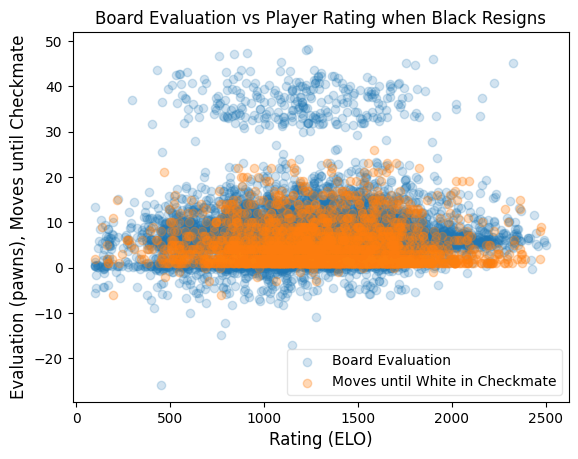

In [44]:
plt.title('Board Evaluation vs Player Rating when Black Resigns')
plt.xlabel('Rating (ELO)', fontsize=12)
plt.ylabel('Evaluation (pawns), Moves until Checkmate', fontsize=12)
plt.scatter(black_resigns['black_rating'], black_resigns['evaluation'], alpha=0.2, label='Board Evaluation')
plt.scatter(black_resigns['black_rating'], black_resigns['mate'], alpha=0.3, label='Moves until White in Checkmate')
plt.legend(framealpha=0.5)
plt.show()

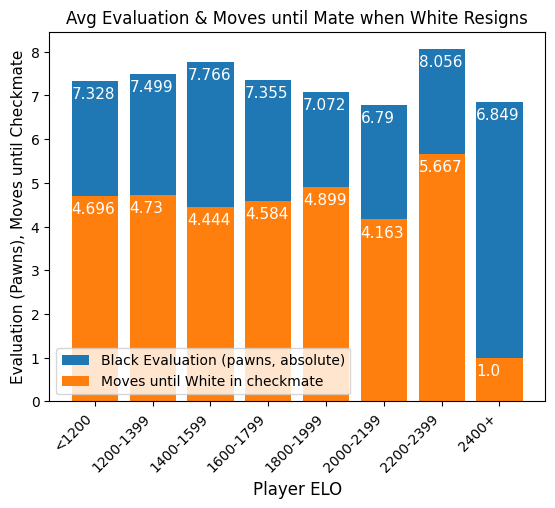

In [19]:
evals = dict(white_resigns.groupby('white_group')['evaluation'].mean())
mates = dict(white_resigns.groupby('white_group')['mate'].mean())
xs = list(evals.keys())
evals = [-i for i in list(evals.values())]
mates = [-i for i in list(mates.values())]

plt.title('Avg Evaluation & Moves until Mate when White Resigns')
bars = plt.bar(xs, evals, label='Black Evaluation (pawns, absolute)') + \
    plt.bar(xs, mates, label='Moves until White in checkmate')
for bar in bars:
    yval = round(bar.get_height(), 3)
    plt.text(bar.get_x(), yval-0.4, yval, ha='left', color='white', fontsize=11)
plt.legend(loc='lower left')
plt.ylabel("Evaluation (Pawns), Moves until Checkmate", fontsize=11)
plt.xlabel("Player ELO", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

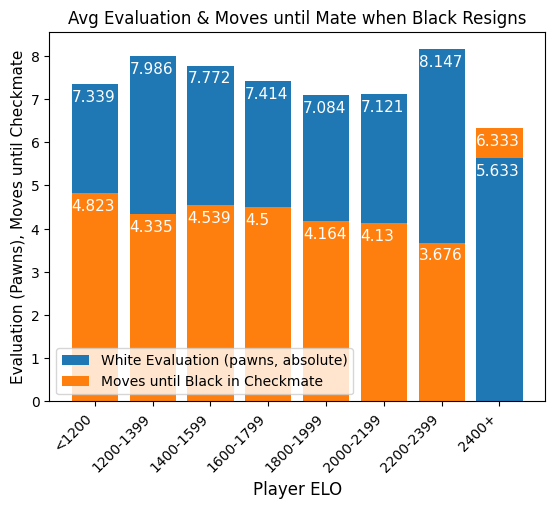

In [20]:
evals = dict(black_resigns.groupby('black_group')['evaluation'].mean())
mates = dict(black_resigns.groupby('black_group')['mate'].mean())
xs = list(evals.keys())
evals = list(evals.values())
mates = list(mates.values())

plt.title('Avg Evaluation & Moves until Mate when Black Resigns')
bars = plt.bar(xs[:-1], evals[:-1], label='White Evaluation (pawns, absolute)') + \
    plt.bar(xs[:-1], mates[:-1], label='Moves until Black in Checkmate') + \
    plt.bar(xs[-1], evals[-1], zorder=2, color = '#1f77b4') + \
    plt.bar(xs[-1], mates[-1], zorder=1, color = '#ff7f0e')
for bar in bars:
    yval = round(bar.get_height(), 3)
    plt.text(bar.get_x(), yval-0.4, yval, ha='left', color='white', fontsize=11)
plt.legend(loc='lower left')
plt.ylabel("Evaluation (Pawns), Moves until Checkmate", fontsize=11)
plt.xlabel("Player ELO", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()